# 3A Gradient Descent with Momentum

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
# this cell will take a minute to run depending on your internet connection
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # getting data from online
print('X shape:', X.shape, 'y shape:', y.shape)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


X shape: (70000, 784) y shape: (70000,)


In [3]:
# this cell processes some of the data
#y = np.array(y) #need this

digits = {j:[] for j in range(10)}
for j in range(len(y)): # takes data assigns it into a dictionary
    #digits[int(y[j])].append(X[j].reshape(28,28))
    #added the following 3 lines cause the above line wouldnt work
    current_y = int(y.iloc[j])
    current_X = np.array(X.iloc[j]).reshape(28,28)
    digits[current_y].append(current_X)

digits = {j:np.stack(digits[j]) for j in range(10)} # stack everything to be one numpy array
for j in range(10):
    print('Shape of data with label', j, ':', digits[j].shape )

Shape of data with label 0 : (6903, 28, 28)
Shape of data with label 1 : (7877, 28, 28)
Shape of data with label 2 : (6990, 28, 28)
Shape of data with label 3 : (7141, 28, 28)
Shape of data with label 4 : (6824, 28, 28)
Shape of data with label 5 : (6313, 28, 28)
Shape of data with label 6 : (6876, 28, 28)
Shape of data with label 7 : (7293, 28, 28)
Shape of data with label 8 : (6825, 28, 28)
Shape of data with label 9 : (6958, 28, 28)


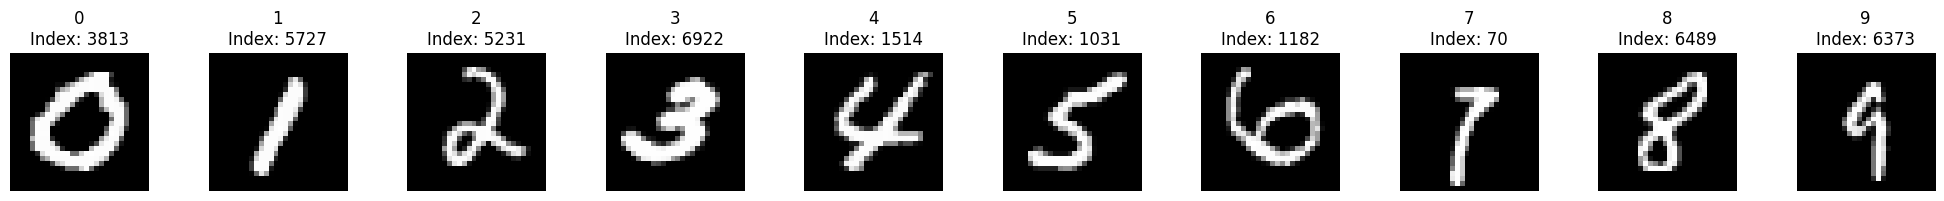

In [4]:
# plot data here (this should have an output)
fig, axarr = plt.subplots(1, 10, figsize=(20, 2))

random_indices = {}
for j in range(10):
    idx = np.random.randint(digits[j].shape[0])
    axarr[j].imshow(digits[j][idx], cmap='gray')
    axarr[j].axis('off')
    axarr[j].set_title(str(j) + "\nIndex: " + str(idx))
    random_indices[j] = idx

plt.tight_layout()
plt.show()

In [12]:
def compute_gradient(w, X, y) :
    """
    Compute the gradient of the logistic regression objective.
    """
    N = X.shape[0]
    z = y * np.dot(X, w)
    dz = -y / (1 + np.exp(z))
    grad = np.dot(dz, X) / N
    return grad

def logistic_regression_with_momentum(X, y, mu=1e-4, alpha=0.9, T=1000):
    """
    Perform gradient descent with momentum to optimize the logitic regression objective.
    """
    w = np.zeros(X.shape[1]) # initialize weights to zero
    v = np.zeros(X.shape[1]) # initialize momentum vector to zero
    F_values = [] # list to store values of F(w) for each iteration

    for t in range(T):
        grad = compute_gradient(w, X, y)
        v = alpha * v - mu * grad # update momentum
        w = w + v # update weights

        #calculate and store the current value of F(w)
        F_value = np.mean(np.log(1 + np.exp(-y * np.dot(X, w))))
        F_values.append(F_value)

    return w, F_values

In [6]:
# Selecting the first 500 examples of 4’s and 9’s for training
X_train_4 = digits[4][:500].reshape(500, 784)
X_train_9 = digits[9][:500].reshape(500, 784)

y_train_4 = np.full(500, -1)  # We'll use -1 for 4s
y_train_9 = np.full(500, 1)   # We'll use 1 for 9s

# Combining the training data and labels
X_train_49 = np.vstack([X_train_4, X_train_9])
y_train_49 = np.hstack([y_train_4, y_train_9])

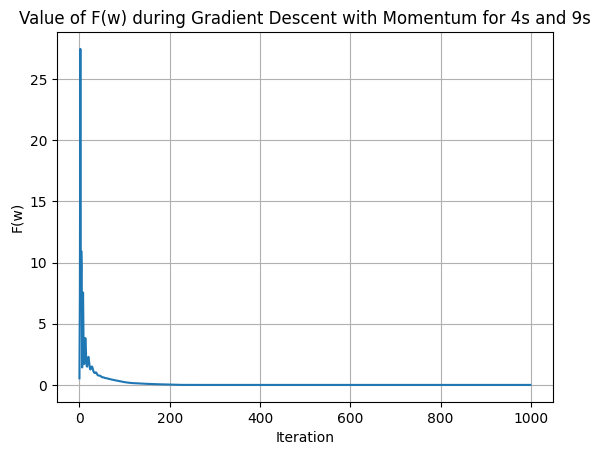

In [13]:
# running gradient descent with momentum for 4s and 9s
w_opt_49_momentum, F_values_49_momentum = logistic_regression_with_momentum(X_train_49, y_train_49)

#plotting F(w)
plt.plot(F_values_49_momentum)
plt.xlabel('Iteration')
plt.ylabel('F(w)')
plt.title('Value of F(w) during Gradient Descent with Momentum for 4s and 9s')
plt.grid(True)
plt.show()

# 3b Gradient Descent with Nesterov Acceleration

In [10]:
def compute_gradient_nesterov(w, X, y, v, alpha) :
    """
    Compute the gradient for Nesterov Accelerated Gradient.
    """
    N = X.shape[0]
    # apply intermediate update
    w_lookahead = w + alpha * v
    # compute the gradient at the lookahead weights
    z = y * np.dot(X, w_lookahead)
    dz = -y / (1 + np.exp(z))
    grad = np.dot(dz, X) / N
    return grad

def logistic_regression_nesterov(X, y, mu=1e-4, alpha=0.9, T=1000):
    """
    Perform gradient descent with Nesterov accelerated gradient to optimize the logistic regression objective.
    """
    w = np.zeros(X.shape[1]) # initialize weights to zero
    v = np.zeros(X.shape[1]) # initialize momentum vector to zero
    F_values = [] # list to store values of F(w) for each iteration

    for t in range(T):
        grad = compute_gradient_nesterov(w, X, y, v, alpha)
        v = alpha * v - mu * grad # Nesterov update
        w = w + v # update weights

        #calculate and store the current value of F(w)
        F_value = np.mean(np.log(1 + np.exp(-y * np.dot(X, w))))
        F_values.append(F_value)

    return w, F_values

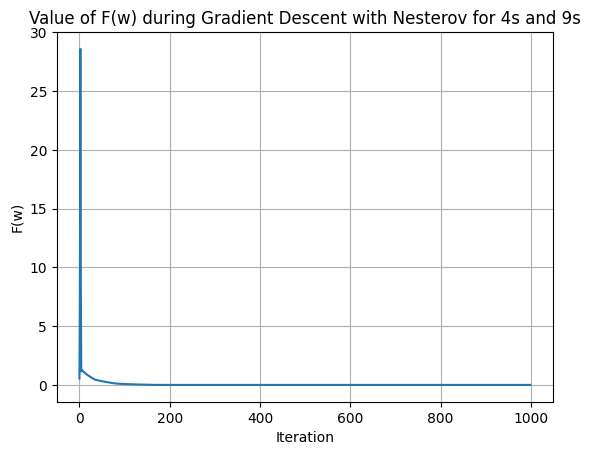

In [11]:
w_opt_49_nesterov, F_values_49_nesterov = logistic_regression_nesterov(X_train_49, y_train_49)

# plotting F(w)
plt.plot(F_values_49_nesterov)
plt.xlabel('Iteration')
plt.ylabel('F(w)')
plt.title('Value of F(w) during Gradient Descent with Nesterov for 4s and 9s')
plt.grid(True)
plt.show()